Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


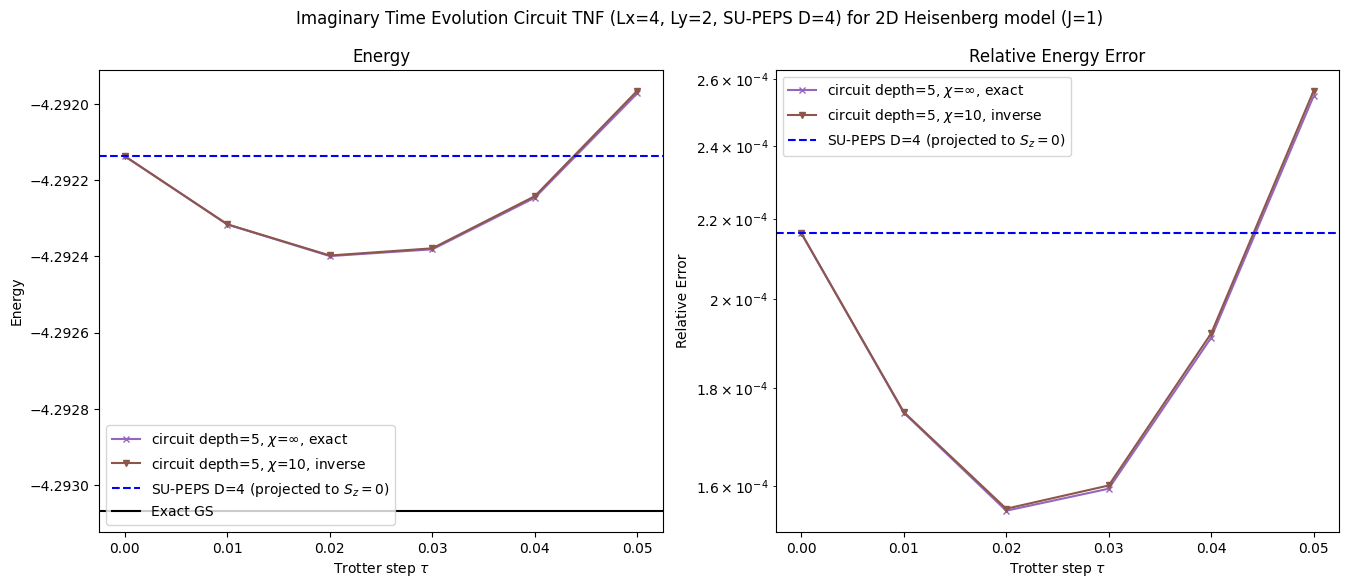

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 5
    chis = [-1, 2, 4, 6, 8, 10]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.292137518079109
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle=':', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend()

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend()
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -3.973448970418529
SU-PEPS D=2 energy: -4.037483743834537


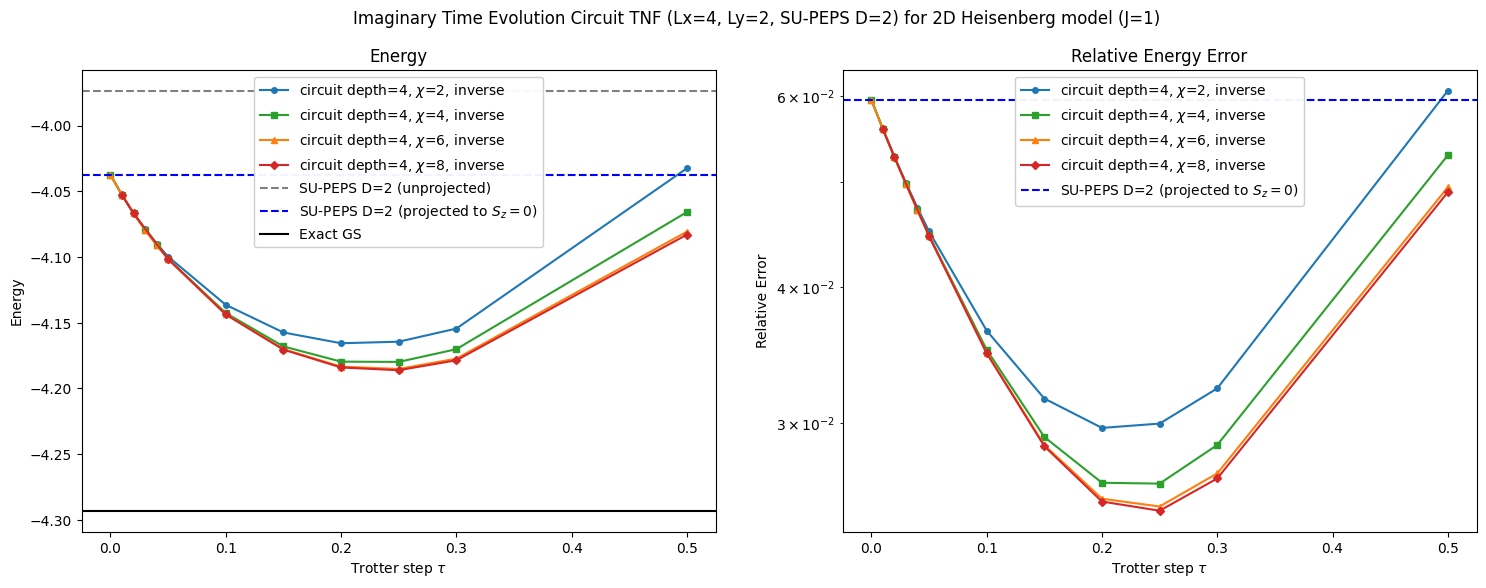

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 2
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 4
    chis = [-1, 2, 4, 6, 8]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


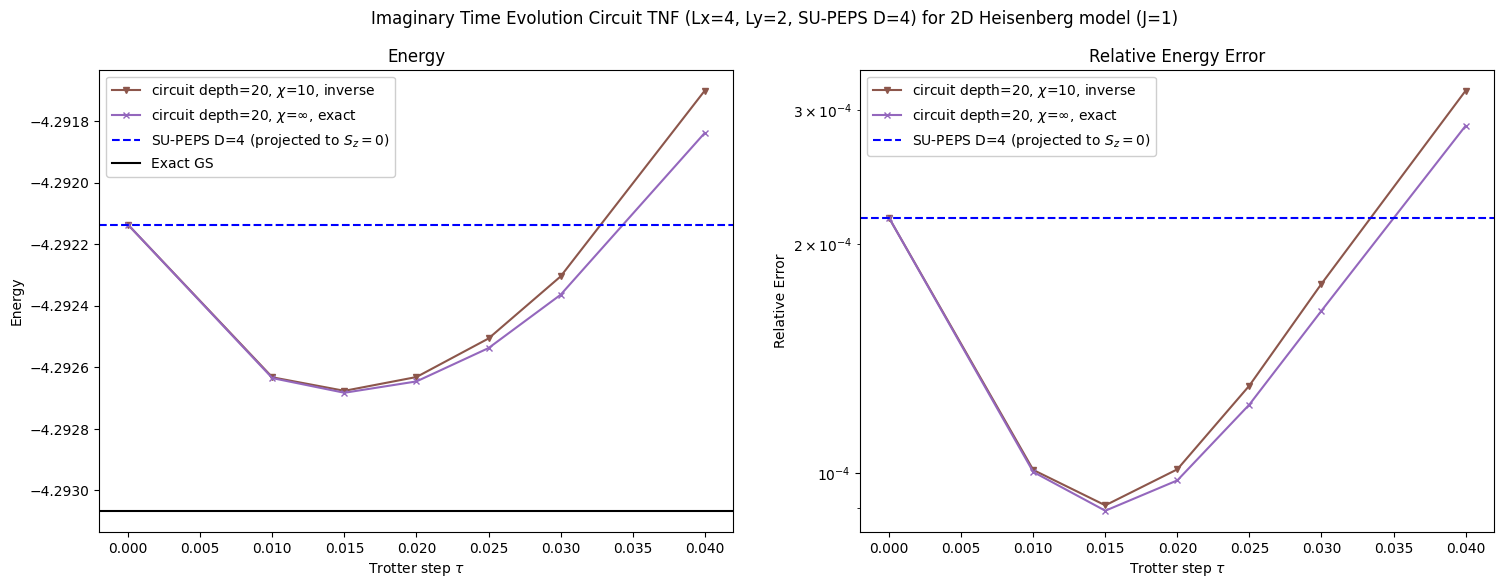

In [56]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 20
    chis = [2, 4, 6, 8, 10, -1]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


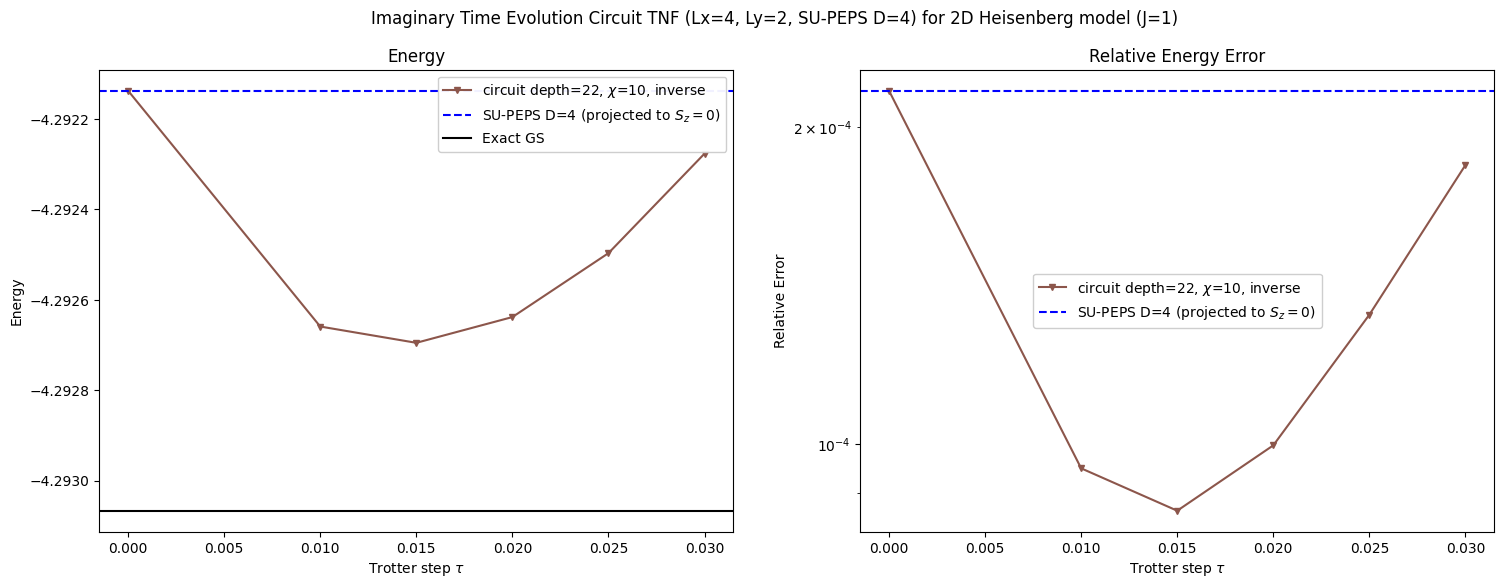

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 22
    chis = [2, 4, 6, 8, 10, -1]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -9.189207065192965
Unprojected SU state energy: -9.00535201305771
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: -9.00535201305771
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: -9.00535201305771
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: -9.00535201305771
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: -9.00535201305771


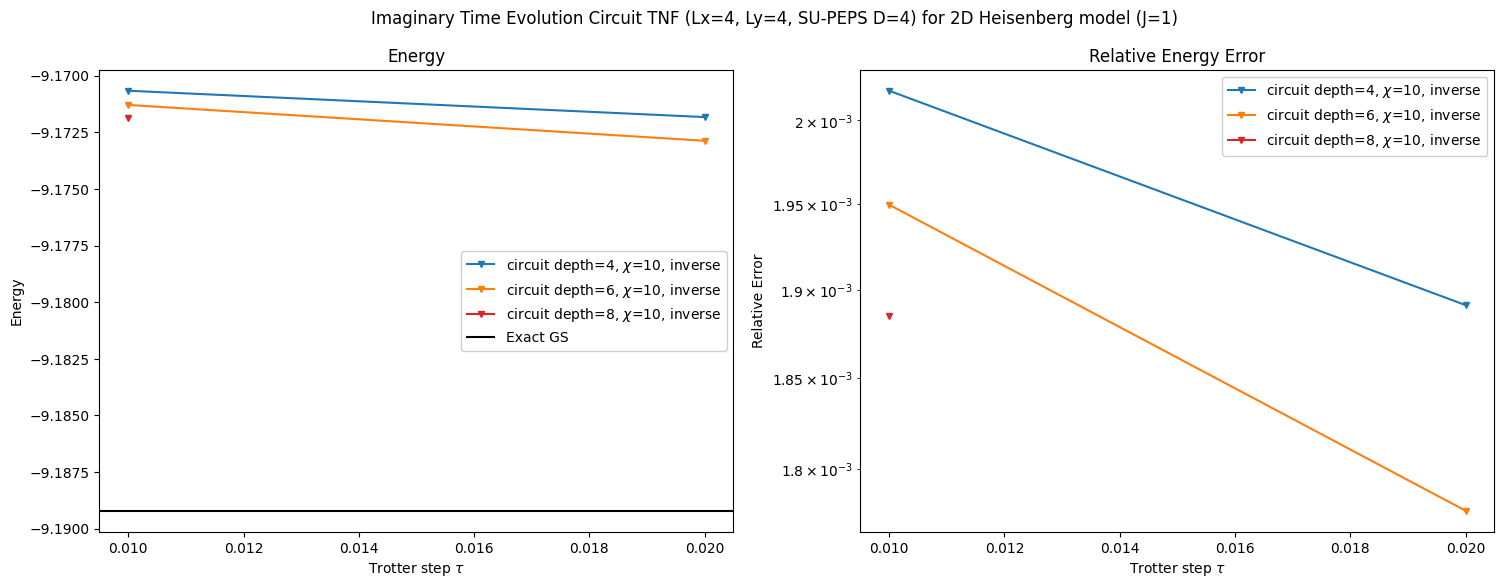

[0.00188527]


In [68]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 4
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_su_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_inverse_su.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    depth_colors = {4: 'tab:blue', 6: 'tab:orange', 8: 'tab:red', 10: 'tab:green', 12: 'tab:brown'}
    depth_ls = [4,6,8, 10, 12]

    for depth in depth_ls:
        chis = [10, -1]
        
        chi_tau_Es = {chi: [] for chi in chis}
        exact_E = data_dict.values().__iter__().__next__()[2]
        print(f'Exact ground state energy: {exact_E}')
        SU_E_raw = data_dict.values().__iter__().__next__()[1]
        print(f'Unprojected SU state energy: {SU_E_raw}')
        for depth_tau_chi, Es in data_dict.items():
            d, tau, chi = depth_tau_chi
            if d == depth and chi in chis:
                chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
                # if tau==0.0:
                #     SU_E = Es[0]
                #     print(f'Projected SU state energy: {SU_E}')

        for chi, values in chi_tau_Es.items():
            chi_tau_Es[chi] = np.array(values).transpose()


        for chi, plot_data in chi_tau_Es.items():
            try:
                taus, Es = plot_data
                # sort by taus
                sorted_indices = np.argsort(taus)
                taus = taus[sorted_indices]
                Es = Es[sorted_indices]
                chi_legend = chi if chi != -1 else r'$\infty$'
                direction_legend = direction if chi != -1 else 'exact'
                ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])

                # rel err
                rel_errs = np.abs((Es - exact_E) / exact_E)
                ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])
                
            except ValueError:
                continue

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# # ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

# ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()
print(rel_errs)

Exact ground state energy: -9.189207065192965
Unprojected SU state energy: 0.0
Depth 4, chi 10, tau=0 energy: -9.169281673055659, rel err: 0.0021683472791444772
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: 0.0
Depth 6, chi 10, tau=0 energy: -9.16928167305566, rel err: 0.0021683472791442842
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: 0.0
Depth 8, chi 10, tau=0 energy: -9.169281673055659, rel err: 0.0021683472791444772
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: 0.0
Depth 10, chi 10, tau=0 energy: -9.16928167305566, rel err: 0.0021683472791442842
Exact ground state energy: -9.189207065192965
Unprojected SU state energy: 0.0
Depth 12, chi 10, tau=0 energy: -9.16928167305566, rel err: 0.0021683472791442842


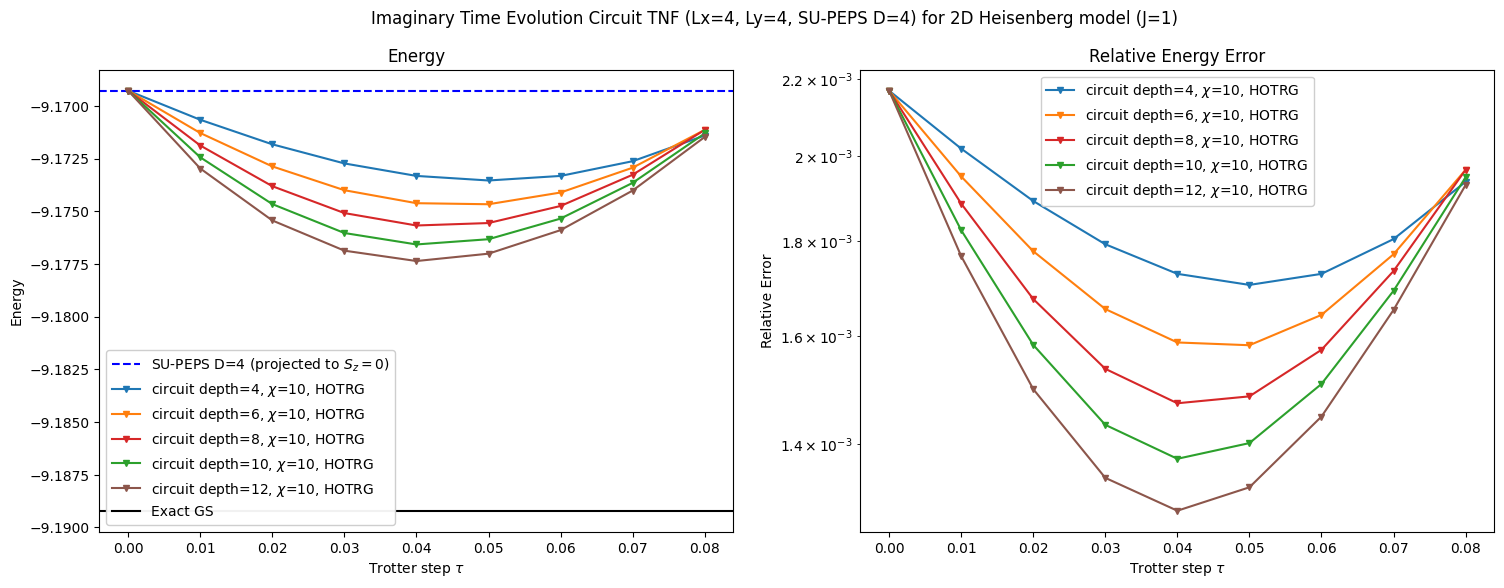

[0.00216835 0.00176677 0.00149855 0.00134264 0.0012891  0.00132704
 0.0014485  0.00165283 0.00192932]


In [81]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 4
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plot_depth_ls = []
rel_errs_ls = []
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'HOTRG'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
    direction_linestyles = {'spatial': '--', 'HOTRG': '-'}
    depth_colors = {4: 'tab:blue', 6: 'tab:orange', 8: 'tab:red', 10: 'tab:green', 12: 'tab:brown'}
    depth_ls = [4,6,8, 10, 12]

    SU_E = -9.169281673055659 if D==4 else None
    ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
    
    for depth in depth_ls:
        chis = [10, -1]
        
        chi_tau_Es = {chi: [] for chi in chis}
        exact_E = data_dict.values().__iter__().__next__()[2]
        print(f'Exact ground state energy: {exact_E}')
        SU_E_raw = data_dict.values().__iter__().__next__()[1]
        print(f'Unprojected SU state energy: {SU_E_raw}')
        for depth_tau_chi, Es in data_dict.items():
            d, tau, chi = depth_tau_chi
            if d == depth and chi in chis:
                chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
                # if tau==0.0:
                if tau==0.04:
                    plot_depth_ls.append(depth)
                    rel_errs_ls.append(np.abs((Es[0] - exact_E) / exact_E))
                #     SU_E = Es[0]
                #     print(f'Projected SU state energy: {SU_E}')

        for chi, values in chi_tau_Es.items():
            chi_tau_Es[chi] = np.array(values).transpose()


        for chi, plot_data in chi_tau_Es.items():
            try:
                taus, Es = plot_data
                # sort by taus
                sorted_indices = np.argsort(taus)
                taus = taus[sorted_indices]
                Es = Es[sorted_indices]
                chi_legend = chi if chi != -1 else r'$\infty$'
                direction_legend = direction if chi != -1 else 'exact'
                ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])

                # rel err
                rel_errs = np.abs((Es - exact_E) / exact_E)
                ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])

                if taus[0] == 0:
                    print(f'Depth {depth}, chi {chi}, tau=0 energy: {Es[0]}, rel err: {rel_errs[0]}')
                
            except ValueError:
                continue

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')

ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

# ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()
print(rel_errs)

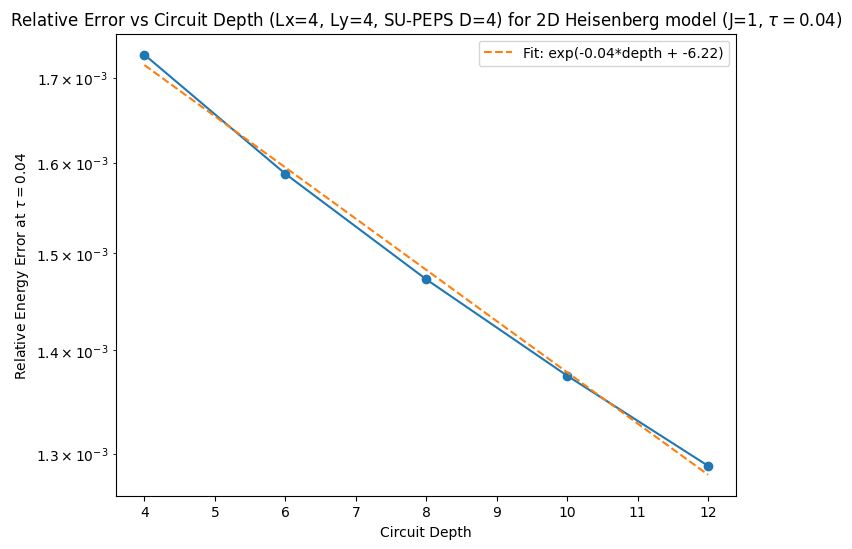

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale('log')
ax.set_xlabel('Circuit Depth')
ax.set_ylabel(r'Relative Energy Error at $\tau=0.04$')
ax.plot(plot_depth_ls, rel_errs_ls, marker='o')
# linear fit in log scale
log_rel_errs_ls = np.log(rel_errs_ls)
coeffs = np.polyfit(plot_depth_ls, log_rel_errs_ls, 1)
fit_line = np.exp(np.polyval(coeffs, plot_depth_ls))
ax.plot(plot_depth_ls, fit_line, linestyle='--', label=f'Fit: exp({coeffs[0]:.2f}*depth + {coeffs[1]:.2f})')
ax.legend()
plt.title(rf'Relative Error vs Circuit Depth (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1, $\tau=0.04$)')
plt.show()

Text(0.5, 0.98, 'Time Cost per Amplitude Evaluation (Lx=4, Ly=4, SU-PEPS D=4) vs Circuit Depth')

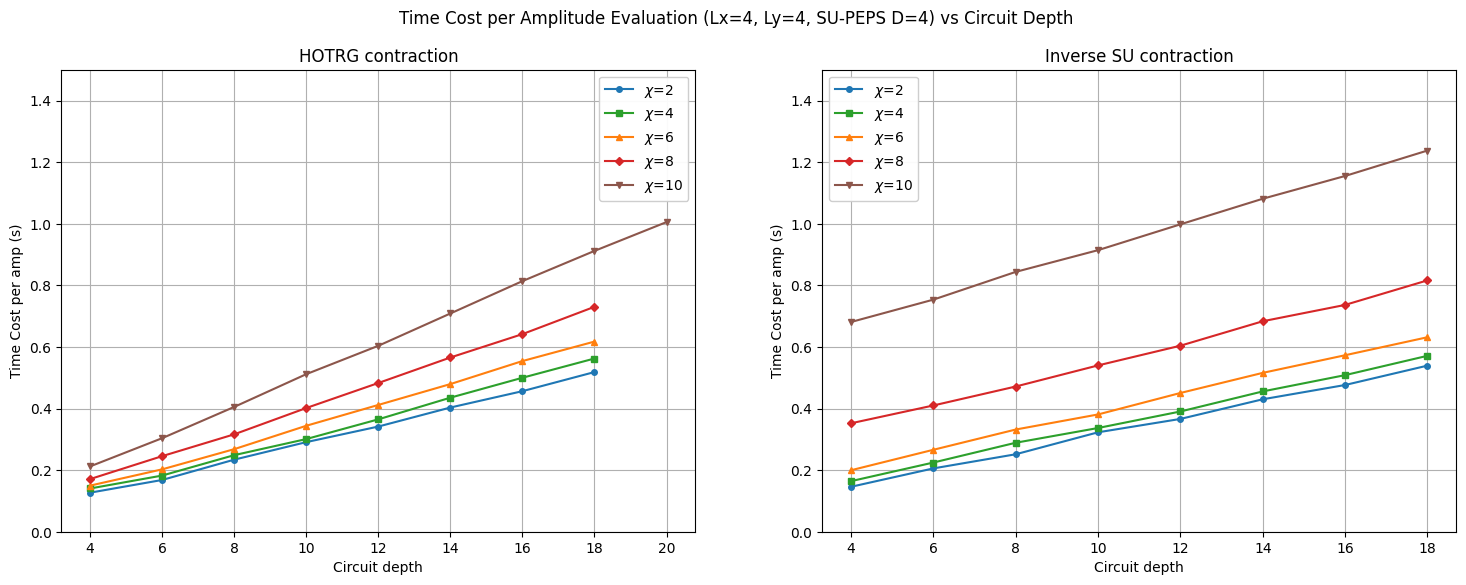

In [79]:
# Time cost
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 4
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_time_cost.json", 'r'))
    data_dict = {}
    for name, times in data.items():
        if name.endswith('su'):
            continue
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = times

    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    depth_colors = {4: 'tab:blue', 6: 'tab:orange', 8: 'tab:red', 10: 'tab:green', 12: 'tab:brown'}
    chi_ls = [2,4,6,8,10]
    tau = 0.04
    for chi0 in chi_ls:
        depth_t_dict = {}
        for depth_tau_chi, t in data_dict.items():
            d, tau, chi = depth_tau_chi
            if chi == chi0 and tau == tau:
                depth_t_dict[d] = t
    
        # print(chi0, depth_t_dict)

        xs = list(depth_t_dict.keys())
        ys = [depth_t_dict[x] for x in xs]
        sorted_indices = np.argsort(xs)
        xs = np.array(xs)[sorted_indices]
        ys = np.array(ys)[sorted_indices]
        ax[0].plot(xs, ys, label=rf'$\chi$={chi0}', marker=chi_symbol[chi0], markersize=4, linestyle='-', color=chi_colors[chi0])


    ax[0].set_xlabel(r'Circuit depth')
    ax[0].set_ylabel('Time Cost per amp (s)')
    ax[0].grid()

    ax[0].legend(framealpha=0.95)
    ax[0].set_title('HOTRG contraction')


direction = 'spatial' if from_which[0]=='y' else 'inverse'
# read json data
data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_time_cost.json", 'r'))
data_dict = {}
for name, times in data.items():
    if name.endswith('su'):
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = times

chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
direction_linestyles = {'spatial': '--', 'inverse': '-'}
depth_colors = {4: 'tab:blue', 6: 'tab:orange', 8: 'tab:red', 10: 'tab:green', 12: 'tab:brown'}
chi_ls = [2,4,6,8,10]
tau = 0.04
for chi0 in chi_ls:
    depth_t_dict = {}
    for depth_tau_chi, t in data_dict.items():
        d, tau, chi = depth_tau_chi
        if chi == chi0 and tau == tau:
            depth_t_dict[d] = t

    # print(chi0, depth_t_dict)

    xs = list(depth_t_dict.keys())
    ys = [depth_t_dict[x] for x in xs]
    sorted_indices = np.argsort(xs)
    xs = np.array(xs)[sorted_indices]
    ys = np.array(ys)[sorted_indices]
    ax[1].plot(xs, ys, label=rf'$\chi$={chi0}', marker=chi_symbol[chi0], markersize=4, linestyle='-', color=chi_colors[chi0])


ax[1].set_xlabel(r'Circuit depth')
ax[1].set_ylabel('Time Cost per amp (s)')
ax[1].grid()

ax[1].legend(framealpha=0.95)
ax[1].set_title('Inverse SU contraction')

ax[0].set_ylim(0, 1.5)
ax[1].set_ylim(0, 1.5)

plt.suptitle(rf'Time Cost per Amplitude Evaluation (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) vs Circuit Depth')

Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.2379081741640245
Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.2379081741640245
Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.2379081741640245


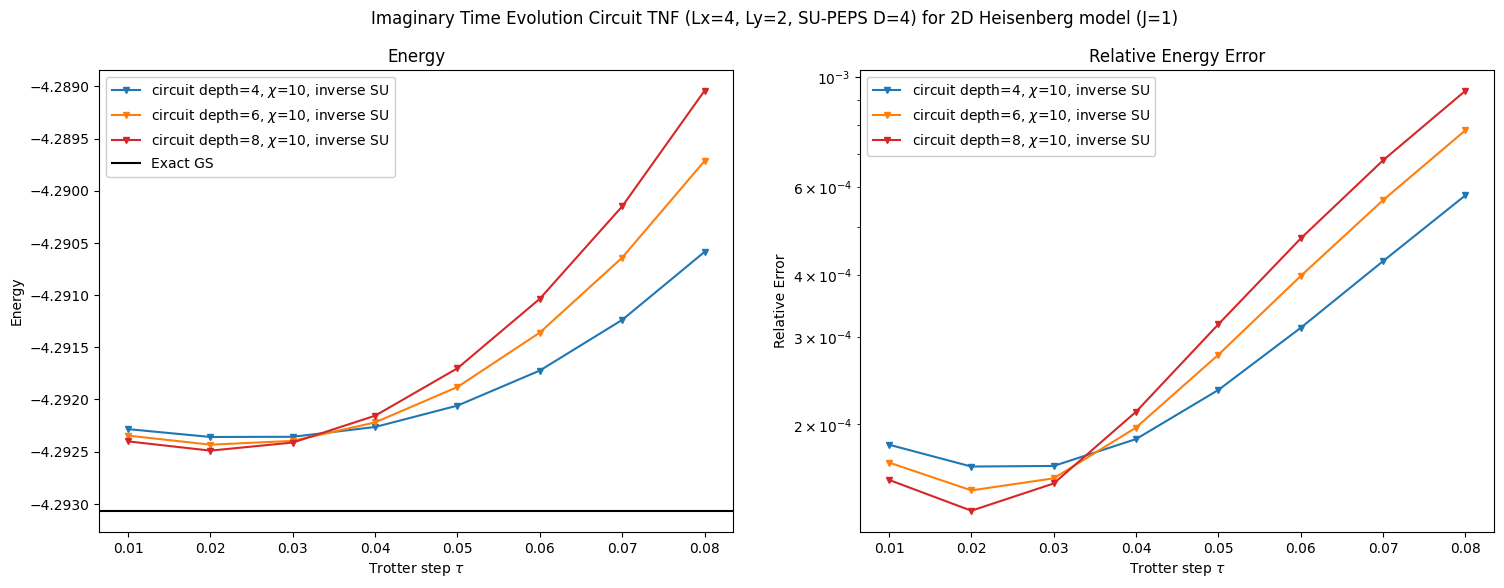

[0.00015473 0.00013415 0.00015219 0.00021212 0.00031804 0.00047315
 0.00067937 0.00093749]


In [11]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse SU'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_su_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_inverse_su.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
    direction_linestyles = {'spatial': '--', 'inverse SU': '-'}
    depth_colors = {4: 'tab:blue', 6: 'tab:orange', 8: 'tab:red'}
    depth_ls = [4,6,8]

    for depth in depth_ls:
        chis = [10, -1]
        
        chi_tau_Es = {chi: [] for chi in chis}
        exact_E = data_dict.values().__iter__().__next__()[2]
        print(f'Exact ground state energy: {exact_E}')
        SU_E_raw = data_dict.values().__iter__().__next__()[1]
        print(f'Unprojected SU state energy: {SU_E_raw}')
        for depth_tau_chi, Es in data_dict.items():
            d, tau, chi = depth_tau_chi
            if d == depth and chi in chis:
                chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
                # if tau==0.0:
                #     SU_E = Es[0]
                #     print(f'Projected SU state energy: {SU_E}')

        for chi, values in chi_tau_Es.items():
            chi_tau_Es[chi] = np.array(values).transpose()


        for chi, plot_data in chi_tau_Es.items():
            try:
                taus, Es = plot_data
                # sort by taus
                sorted_indices = np.argsort(taus)
                taus = taus[sorted_indices]
                Es = Es[sorted_indices]
                chi_legend = chi if chi != -1 else r'$\infty$'
                direction_legend = direction if chi != -1 else 'exact'
                ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])

                # rel err
                rel_errs = np.abs((Es - exact_E) / exact_E)
                ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])
                
            except ValueError:
                continue

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# # ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

# ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()
print(rel_errs)

Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062


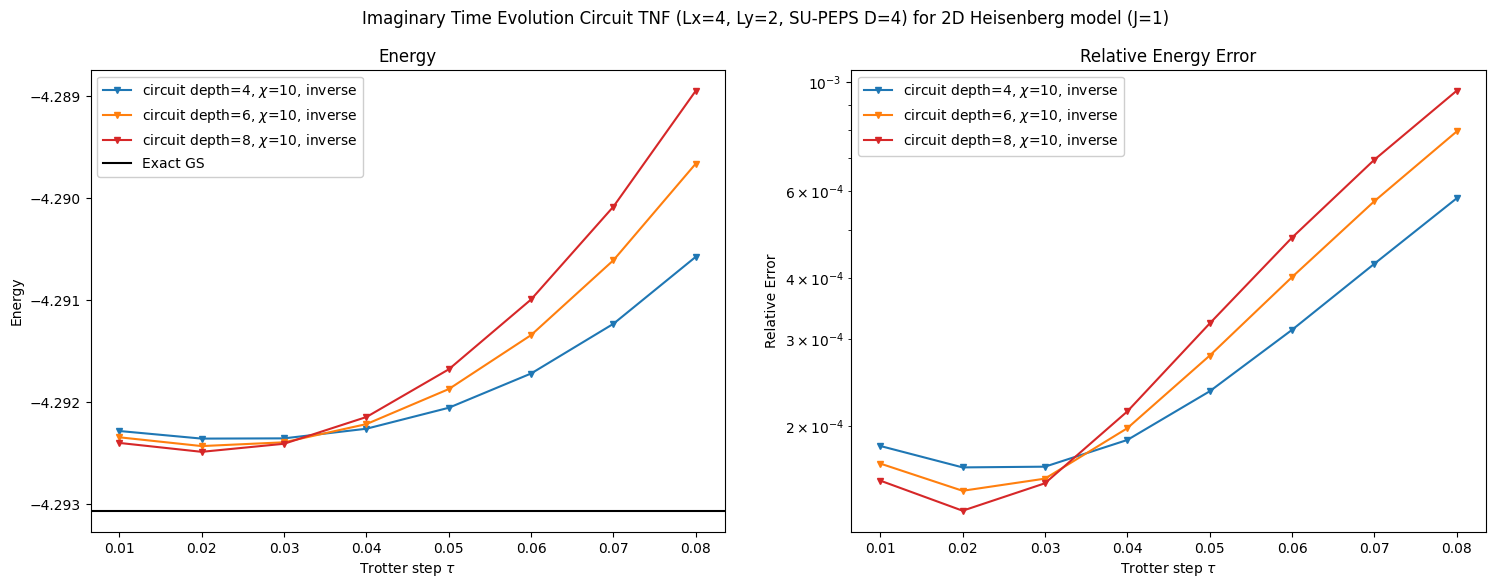

[0.00015495 0.0001346  0.00015305 0.00021416 0.00032318 0.00048291
 0.00069514 0.00096003]


In [19]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    depth_colors = {4: 'tab:blue', 6: 'tab:orange', 8: 'tab:red'}
    depth_ls = [4,6,8]

    for depth in depth_ls:
        chis = [10]
        
        chi_tau_Es = {chi: [] for chi in chis}
        exact_E = data_dict.values().__iter__().__next__()[2]
        print(f'Exact ground state energy: {exact_E}')
        SU_E_raw = data_dict.values().__iter__().__next__()[1]
        print(f'Unprojected SU state energy: {SU_E_raw}')
        for depth_tau_chi, Es in data_dict.items():
            d, tau, chi = depth_tau_chi
            if d == depth and chi in chis:
                chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
                # if tau==0.0:
                #     SU_E = Es[0]
                #     print(f'Projected SU state energy: {SU_E}')

        for chi, values in chi_tau_Es.items():
            chi_tau_Es[chi] = np.array(values).transpose()


        for chi, plot_data in chi_tau_Es.items():
            try:
                taus, Es = plot_data
                # sort by taus
                sorted_indices = np.argsort(taus)
                taus = taus[sorted_indices]
                Es = Es[sorted_indices]
                if taus[0]==0.0:
                    taus = taus[1:]
                    Es = Es[1:]
                chi_legend = chi if chi != -1 else r'$\infty$'
                direction_legend = direction if chi != -1 else 'exact'
                ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])

                # rel err
                rel_errs = np.abs((Es - exact_E) / exact_E)
                ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=depth_colors[depth])
                
            except ValueError:
                continue

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# # ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

# ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()
print(rel_errs)